# Team Project, Group One

### Project title: Customer Churn Prediction

### This notebook contains the code for a customer churn prediction project for our term project
### Subject: APPLIED MATHEMATICAL CONCEPTS FOR MACHINE LEARNING CRN-48756-202502
#### Dataset: https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset
#### Github Repo: https://github.com/varsha-jai/MathAI_Term_Project

**Authors:** Varsha Jaikrishnan, Ali, Aparna, Andy, Jordan, Damir, Iva, Lalit

**Date:**  31/01/2026

**Objective:** The goal of this telecom churn ML project is to predict which customers are likely to leave (churn) soon, so the company can intervene before it happens.

**Dataset:** This dataset is a synthetic customer churn dataset designed to simulate real-world telecom customer behavior. It is generated using business-driven rules based on customer tenure, billing amount, contract type, service usage, and support interactions. Controlled randomness and noise are added to avoid perfect patterns and make the dataset suitable for realistic machine learning classification tasks. The dataset is ideal for beginners to practice exploratory data analysis, feature engineering, and customer churn prediction using machine learning models.  

**Target variable:** Churn

**Evaluation metric:** Accuracy, Recall and F1-score


# 1. Obtain a large classification database. 

#### ANSWER
Our dataset is called "customer_churn_dataset.csv". 
It has 20,000 rows, which are synthetic customer information.
It also has 11 features, for churn prediction.
The URL of the dataset is here: 
https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset?select=customer_churn_dataset.csv

In [1]:
# Loading the customer chrun data into a data frame

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # a library for data visualization
import seaborn as sns # great for making informative plots more easily

from sklearn.preprocessing import StandardScaler # scaling numerical columns
from sklearn.model_selection import train_test_split # splitting data to training & test sets
from sklearn.linear_model import LogisticRegression # logistic regression model for classification 
from sklearn.tree import DecisionTreeClassifier # decision tree model for classification
from sklearn.ensemble import RandomForestClassifier # random forest ensemble model
from sklearn.linear_model import SGDClassifier # stochastic gradient descent classifier
from sklearn.model_selection import GridSearchCV # hyperparameter tuning using grid search with cross-validation
from sklearn.svm import SVC # support vector classifier 
from sklearn.metrics import accuracy_score, classification_report # evaluation metrics for accuracy and detailed classification report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # encodes categorical features into numerical form
from sklearn.metrics import recall_score # evaluates model recall (sensitivity)

df = pd.read_csv("customer_churn_dataset.csv") #loading the dataset

In [2]:
df.head() # A quick overview of the first five rows to understand the structure and sample data 

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [3]:
df.info() # A quick structural snapshot of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  20000 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [4]:
df.shape # The exact dimensions of the dataset 

(20000, 11)

# 2. Provide a description of the dataset, including explanation of various features.


#### ANSWER
This dataset provides symthetic customer churn information. It simulates real-world telecom customer behavior. In also includes controlled randomness and noise to avoid perfect patterns and to make it suitable for beginner machine learning task of customer churn prediction using machine learning models.

The dataset is generated using business-driven rules based on features such as customer tenure, billing amount, contract type, etc.   

Some of the features are as follows:  
"tenure", how long customers have been a customer in months 
"monthly_charges", their monthly bill 
"total_charges", the amount they have paid in total 
"Contract", whether they are month-to-month or on a longer plan 
"Payment_method", how how they pay, i.e. credit or debit  
"Internet_service", such as Fiber, etc. 
"tech_support", whether they have received tech support 
"Support_calls", the number of times they have called support.  

The target feature "churn", which is a Yes/No field, indicates whether they are still with the company or they have left.  

This dataset is a mix of numerical and categorical features for churn prediction.  

# 3. Pre-process and clean the dataset as appropriate

#### First, checking for missing values

In [5]:
df.isnull().sum() # checking for missing values in every column 

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [6]:
# The "internet_service" has 2013 missing values, which is a moderate amount.
mode_value = df['internet_service'].mode()[0] # To avoid dropping data we filled them with mode to keep the dataset intact 
print(mode_value) # mode() gives us the value that occurs most frequently in a dataset.
df['internet_service'] = df['internet_service'].fillna(mode_value) # replacing all the missing values with the most frequent category
df.isnull().sum() # making sure that there is no more missing values

Fiber


customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [7]:
df.duplicated().sum() # checking for duplicate rows

0

#### Second, Converting categorical features into numerical

In [8]:
categorical_columns = df.select_dtypes(include='object').columns # Identifying categorical features (columns)
print(categorical_columns) 

Index(['contract', 'payment_method', 'internet_service', 'tech_support',
       'online_security', 'churn'],
      dtype='object')


In [9]:
df = pd.get_dummies(df, columns=['contract', 'payment_method', 'internet_service', 'tech_support', 'online_security']) # Converting categorical features into numerical form using one-hot encoding
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0}) # converting the target value to numerical
df.shape # given the one-hot encoding we are going to have new columns 

(20000, 20)

#### Scaling

In [10]:
columns_to_drop = ['churn']
if 'customer_id' in df.columns: 
    columns_to_drop.append('customer_id') # First check if the column exists before dropping it

X = df.drop(columns=columns_to_drop)  # Separating X and y before scaling
y = df['churn']

numeric_cols = X.select_dtypes(include='number').columns  # Identifying all the numerical columns
scaler = StandardScaler()  # adjusts every value so they have a mean of zero and a standard deviation of one.
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

#### Third, Detecting the outlier values 

In [11]:
z_scores = np.abs((df - df.mean()) / df.std()) # calculating the absolute z-scores
outliers = z_scores > 3 # choosing 3 is a rule of thumb
print(outliers.sum().sum()) # repeating sum once for a row and once for a column
df = df[~outliers.any(axis=1)] # keeping all the rows that are NOT outliers

136


#### Fourth, feature selection 

In [12]:
customer_ids = df['customer_id'] # Removing "customer_id" from the feature set
df = df.drop(columns=['customer_id']) # It is not relevant to customer churn

#### Fifth, spilitting dataset into train (80%) and test (20%) sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y) # splitting the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 18)
(16000,)
(4000, 18)
(4000,)


#### Sixth, Visualizing churn distribution to check for imbalance

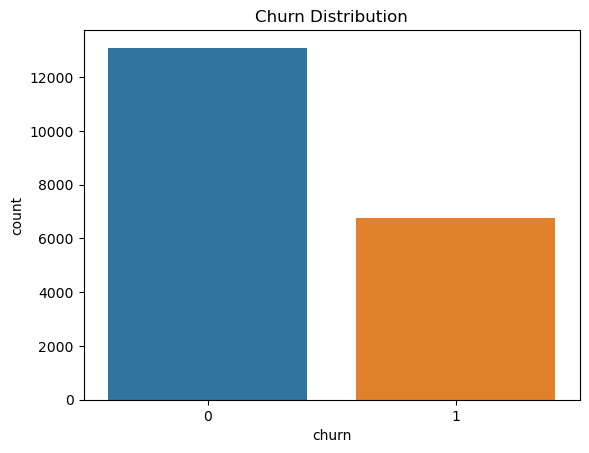

In [14]:
plt.figure()
sns.countplot(x="churn", data=df) # Showing the distribution of churned vs non-churned customers
plt.title("Churn Distribution")
plt.show()

##### In churn datasets, it’s common to see fewer customers leaving (churn 34.22%) than staying (non-churn 65.79%).
##### This imbalance reflects reality, because most businesses retain a majority of customers, while a smaller portion churns.¶
#### 

#### Seventh, Exploring data: finding relationships and distributions 

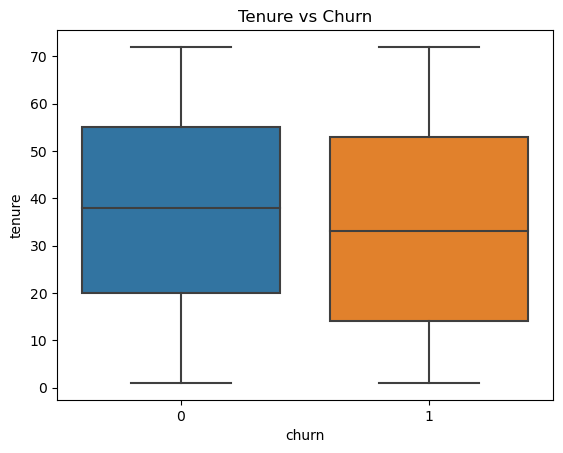

In [15]:
plt.figure()
sns.boxplot(x="churn", y="tenure", data=df) # helping us spot whether shorter or longer tenure are associated with churn
plt.title("Tenure vs Churn")
plt.show()

#### It seems that tenured customers more likely to stay and not churn

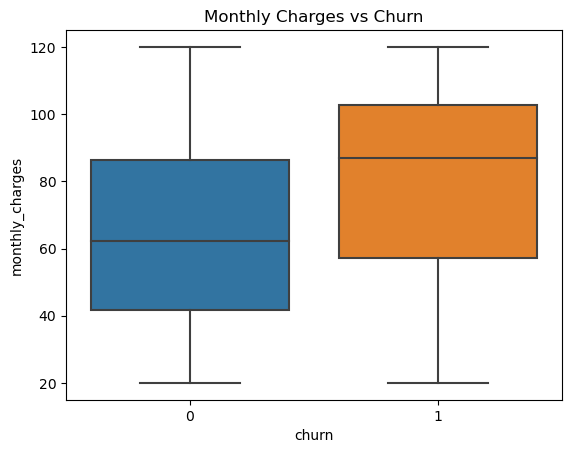

In [16]:
plt.figure()
sns.boxplot(x="churn", y="monthly_charges", data=df) # showing how monthly charges differ between those who churn and those who don’t
plt.title("Monthly Charges vs Churn")
plt.show()

#### It seems that customers with low monthly charges are more likely to stay and not churn

In [17]:
df.columns

Index(['tenure', 'monthly_charges', 'total_charges', 'support_calls', 'churn',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'payment_method_Cash', 'payment_method_Credit', 'payment_method_Debit',
       'payment_method_UPI', 'internet_service_DSL', 'internet_service_Fiber',
       'internet_service_None', 'tech_support_No', 'tech_support_Yes',
       'online_security_No', 'online_security_Yes'],
      dtype='object')

# It seems that customers with longer contract are more likely to stay and not churn

# 4. Use following approaches for classification of the dataset:
# A. Logistic Regression
# B. Decision Tree
# C. Random Forest
# D. SGD
# E. SVM

# 4.A Logistic Regression

In [18]:
log_reg = LogisticRegression(class_weight ='balanced', random_state = 42) # Initialize the model, allowing it to run up to 1,000 iterations
 
log_reg.fit(X_train, y_train) # Training the Logistic Regression on our data 

y_pred = log_reg.predict(X_test) # Making predictions on unseen data (test dataset)

accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
report = classification_report(y_test, y_pred)
print("Accuracy Logistic Regression:", accuracy)# Printing results
print(report)
recall_log_reg = recall_score(y_test, y_pred)

Accuracy Logistic Regression: 0.71475
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      2631
           1       0.57      0.72      0.63      1369

    accuracy                           0.71      4000
   macro avg       0.70      0.72      0.70      4000
weighted avg       0.74      0.71      0.72      4000



#### Our logistic regression model achieved a recall of 72% for churned customers, meaning it correctly identified 72% of those who actually left.
#### 

# 4.B Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dctree = DecisionTreeClassifier( class_weight ='balanced', random_state = 42)
dctree.fit(X_train, y_train)
y_pred = dctree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
recall_dc =  recall_score(y_test, y_pred)

Accuracy: 0.7345
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2631
           1       0.62      0.59      0.60      1369

    accuracy                           0.73      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.73      0.73      0.73      4000



#### Our Decision Tree model achieved a recall of 59% for churned customers, meaning it correctly identified 59% of those who actually left.
#### 

# 4.C Random Forest

In [20]:
forest = RandomForestClassifier(n_estimators=100, class_weight ='balanced', random_state = 42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
recall_forest =  recall_score(y_test, y_pred)

Accuracy: 0.83225
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2631
           1       0.83      0.64      0.72      1369

    accuracy                           0.83      4000
   macro avg       0.83      0.79      0.80      4000
weighted avg       0.83      0.83      0.83      4000



#### Our Random Forest model achieved a recall of 64% for churned customers, meaning it correctly identified 64% of those who actually left.

# 4.D SGD

In [21]:
sgd = SGDClassifier(class_weight ='balanced', random_state = 42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
recall_sgd =  recall_score(y_test, y_pred)

Accuracy: 0.70825
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2631
           1       0.56      0.70      0.62      1369

    accuracy                           0.71      4000
   macro avg       0.69      0.71      0.69      4000
weighted avg       0.73      0.71      0.71      4000



#### Our Stochastic Gradient Descent model achieved a recall of 70% for churned customers, meaning it correctly identified 70% of those who actually left.¶ 

# 4.E SVM

In [22]:
svm = SVC( class_weight ='balanced', random_state = 42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
recall_svm=  recall_score(y_test, y_pred)

Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2631
           1       0.71      0.65      0.68      1369

    accuracy                           0.79      4000
   macro avg       0.77      0.76      0.76      4000
weighted avg       0.79      0.79      0.79      4000



In [23]:
print("Recall Logistic Regression: ", recall_log_reg)
print("Recall Decision Tree: ", recall_dc)
print("Recall Random Forest: ", recall_forest)
print("Recall Stochastic Gradient Descent: ", recall_sgd)
print("Recall Support Vector Machine: ", recall_svm)

Recall Logistic Regression:  0.718772826880935
Recall Decision Tree:  0.5887509130752374
Recall Random Forest:  0.6449963476990505
Recall Stochastic Gradient Descent:  0.7005113221329438
Recall Support Vector Machine:  0.6530314097881665


#### Our Support Vector Machine model achieved a recall of 65% for churned customers, meaning it correctly identified 65% of those who actually left.¶¶

#### Conclusion
Based on the recall results, the Logistic Regression model now performed the best, identifying 72% of churned customers. The Stochastic Gradient Descent followed with 70%, and the SVM reached 65%. <br>Accuracy ranges between 70% and 83%. <br> Given that maximizing recall is our priority, we would recommend focusing on the Logistic Regression or Stochastic Gradient Descent models for the best balance of capturing churned customers.<br> Precision is about 50-56% for both these models, which means we are capturing a lot of people who would have been not likely to churn, but this is acceptable to maximize recall for our purposes.

# 5. Use GridSearchCV to tune the parameter of each of the above models. Can you obtain better results in this step for any of the models? Discuss your observations.

# Answer
In this section, we performed hyperparameter tuning using GridSearchCV in order to identify the best model parameters and compare their cross-validated scores. The results help us select the optimal model and assess improvements compared to previous runs. 

In [24]:
# Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 10], 'max_iter': [100,1000]}
log_search = GridSearchCV(log_reg, log_reg_params, cv=5, scoring="recall")

# Decision Tree
tree_params = {'max_depth': [1, 5, 20], 'criterion': ['gini', 'entropy']}
tree_search = GridSearchCV(dctree, tree_params, cv=5, scoring="recall")

# Random Forest
forest_params = {'n_estimators': [10, 100], 'max_depth': [5, 10], 'criterion': ['gini', 'entropy']}
forest_search = GridSearchCV(forest, forest_params, cv=5, scoring="recall")


# SGD Classifier
sgd_params = {'alpha': [0.0001, 0.01, 0.1], 'penalty': ['l1', 'l2', 'elasticnet'], 'max_iter': [100, 1000]}
sgd_search = GridSearchCV(sgd, sgd_params, cv=5, scoring="recall")

# SVM
svm_params = {'C': [0.1, 10], 'kernel': ['linear', 'rbf']}
svm_search = GridSearchCV(svm, svm_params, cv=3, scoring="recall")

# Fit all models to maximize recall
log_search.fit(X_train, y_train)
print("Logistic Regression:", log_search.best_params_, log_search.best_score_)

tree_search.fit(X_train, y_train)
print("Decision Tree:", tree_search.best_params_, tree_search.best_score_)

forest_search.fit(X_train, y_train)
print("Random Forest:", forest_search.best_params_, forest_search.best_score_)

sgd_search.fit(X_train, y_train)
print("SGD Classifier:", sgd_search.best_params_, sgd_search.best_score_)

svm_search.fit(X_train, y_train)
print("SVM:", svm_search.best_params_, svm_search.best_score_)
# Print best parameters and scores

Logistic Regression: {'C': 0.01, 'max_iter': 100} 0.7336500463299191
Decision Tree: {'criterion': 'entropy', 'max_depth': 5} 0.6788413346355797
Random Forest: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10} 0.6828601003397529
SGD Classifier: {'alpha': 0.1, 'max_iter': 100, 'penalty': 'l1'} 0.732920120541267
SVM: {'C': 10, 'kernel': 'linear'} 0.719038292077225


# Observation
#### Logistic Regression: baseline was 72%, while tuned is 73.4%    
#### Decision Tree: baseline was 59%, while tuned is 67.8%
#### Random Forest: baseline was 64%, while tuned is 68.2%
#### SGD Classifier: baseline was 70%, while tuned is 73.5%
#### SVM: baseline was 65%, while tuned is 72%
Overall Tuning improved all models, Recall approaches close to 70% even in the models that were performing very poorly.

# 6. Randomly (or based on certain hypothesis) remove some features and             re-evaluate the models. Document your observations with respect to models performances.

# ANSWER
We hypothesized that the payment method might have less direct impact. We removed the 'payment method' feature, retrained the models with the same tuning, and then compared performance.

In [25]:
X_train_reduced = X_train.drop(columns=['payment_method'], errors='ignore')

# Tuned and Feature Reduced Logistic Regression model
log_reg = LogisticRegression(C= 0.01, max_iter=100, class_weight ='balanced', random_state = 42) # Initialize the model, allowing it to run up to 1,000 iterations
log_reg.fit(X_train_reduced, y_train) # Training the Logistic Regression on our data 
y_pred = log_reg.predict(X_test) # Making predictions on unseen data (test dataset)
#print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred))# Printing results
print("Logistic Regression -- Recall :", recall_score(y_test, y_pred))

# Tuned and Feature Reduced Decision Tree Model
dctree = DecisionTreeClassifier( criterion='entropy', max_depth=5, class_weight ='balanced', random_state = 42)
dctree.fit(X_train_reduced , y_train)
y_pred = dctree.predict(X_test)
#print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred))# Printing results
print("Decision Tree -- Recall :", recall_score(y_test, y_pred))


#Tuned and Feature Reduced Random forest Model
forest = RandomForestClassifier(criterion= 'gini', max_depth= 5, n_estimators= 10, class_weight ='balanced', random_state = 42)
forest.fit(X_train_reduced , y_train)
y_pred = forest.predict(X_test)
#print("Accuracy Random forest:", accuracy_score(y_test, y_pred))# Printing results
print("Random forest -- Recall :", recall_score(y_test, y_pred))

#Tuned and Feature Reduced SGDClassifier
sgd = SGDClassifier(alpha= 0.1, max_iter= 100, penalty= 'l1', class_weight ='balanced', random_state = 42)
sgd.fit(X_train_reduced , y_train)
y_pred = sgd.predict(X_test)
#print("Accuracy SGDClassifier:", accuracy_score(y_test, y_pred))# Printing results
print("SGDClassifier -- Recall :", recall_score(y_test, y_pred))

#Tuned and Feature Reduced SGDClassifier
svm = SVC(C =0.1, kernel= 'linear', class_weight ='balanced', random_state = 42)
svm.fit(X_train_reduced , y_train)
y_pred = svm.predict(X_test)
#print("Accuracy SVM:", accuracy_score(y_test, y_pred))# Printing results
print("SVM -- Recall :", recall_score(y_test, y_pred))

Logistic Regression -- Recall : 0.718772826880935
Decision Tree -- Recall : 0.6544923301680059
Random forest -- Recall : 0.6617969320672024
SGDClassifier -- Recall : 0.7129291453615778
SVM -- Recall : 0.7048940832724616


## Observation 
After removing the “payment_method” feature, all models showed a slight increase in recall, typically by 1-3% and some more than others. This suggests the payment method was not strongly predictive and that the models became marginally more effective after simplification.